In [1]:
import tensorflow as tf
import numpy as np
import random
from constants import TASK_LIST
from constants import INITIAL_ALPHA
from constants import INITIAL_GAMMA
from constants import EPSILON
from constants import NUM_TRA_EPISODES
from constants import NUM_EVAL_EPISODES
from scene_loader import THORDiscreteEnvironment as Environment
from RLalgs.utils import epsilon_greedy
from RLalgs.utils import action_selection


def QLearning(env, num_episodes, gamma, lr, e, plot_list):
    """
    Implement the Q-learning algorithm following the epsilon-greedy exploration.

    Inputs:
    env: THORDiscreteEnvironment
    num_episodes: int
            Number of episodes of training
    gamma: float
            Discount factor.
    lr: float
            Learning rate.
    e: float
            Epsilon value used in the epsilon-greedy method.

    Outputs:
    Q: numpy.ndarray
    """

    Q = np.zeros((env.n_locations, env.nA))
    #i =0
    #while True:
    for i in range(num_episodes):
        env.reset()
        current_state = env.current_state_id
        episode_reward = 0
        episode_length = 0
        start = current_state
        if start not in plot_list:
            plot_list[start]=[]
        delta = []
        while env.terminal==False and episode_length<10000:
            action = epsilon_greedy(Q[current_state], e)
            env.step(action)
            S = env.current_state_id
            if env.terminal == True:
                R = 10
            elif env.collided == True:
                R = -0.1
            else: R = -0.01
            episode_length += 1
            episode_reward += R
            delta.append(R + gamma * np.max(Q[S]) - Q[current_state, action])
            Q[current_state, action] = Q[current_state, action] + lr * (R + gamma * np.max(Q[S]) - Q[current_state, action])
            current_state = S
        #i = i+1
        print ("episodes: ", i)
        print ("delta: ", np.mean(delta))
        plot_list[start].append(episode_reward)
        #if abs(np.mean(delta)) < 0.001: break

    

    return Q






RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


In [2]:
# #Q Learning for realizing the navigation
# if __name__ == '__main__':

list_of_tasks = TASK_LIST
scene_scopes = list_of_tasks.keys()

initial_learning_rate = INITIAL_ALPHA
gamma = INITIAL_GAMMA

branches = []
for scene in scene_scopes:
    for task in list_of_tasks[scene]:
        branches.append((scene, task))

scene, task = branches[0]


env = Environment({
    'scene_name': scene,
    'terminal_state_id': int(task)
})
env.reset()
plot_list = {}
Q = QLearning(env, NUM_TRA_EPISODES, gamma, initial_learning_rate, EPSILON, plot_list)
print (Q)



episodes:  0
delta:  0.0179118320610687
episodes:  1
delta:  0.01946721854304636
episodes:  2
delta:  0.1658
episodes:  3
delta:  1.9922
episodes:  4
delta:  0.04147011494252873
episodes:  5
delta:  0.008565553235908139
episodes:  6
delta:  3.5558975000000004
episodes:  7
delta:  1.9920000000000002
episodes:  8
delta:  0.14539837755102042
episodes:  9
delta:  2.4925
episodes:  10
delta:  0.04284960115606936
episodes:  11
delta:  0.0558630463576159
episodes:  12
delta:  0.07080138130081301
episodes:  13
delta:  0.5463333333333333
episodes:  14
delta:  0.09275218854166666
episodes:  15
delta:  1.4202857142857144
episodes:  16
delta:  2.509188679214843
episodes:  17
delta:  0.05323866197183098
episodes:  18
delta:  1.2303875
episodes:  19
delta:  0.7051357142857143
episodes:  20
delta:  0.186388431372549
episodes:  21
delta:  0.5088947894736842
episodes:  22
delta:  0.13515574057971014
episodes:  23
delta:  0.82450615
episodes:  24
delta:  4.86045
episodes:  25
delta:  0.05913393617241380

episodes:  250
delta:  1.2836312064303246
episodes:  251
delta:  0.24467893661092013
episodes:  252
delta:  0.31334081197290353
episodes:  253
delta:  1.9913060790998611
episodes:  254
delta:  1.9826377268378637
episodes:  255
delta:  1.992866202
episodes:  256
delta:  1.2338274660883495
episodes:  257
delta:  1.5038990876683078
episodes:  258
delta:  2.82429536481
episodes:  259
delta:  1.1028833070956698
episodes:  260
delta:  0.9922067634424175
episodes:  261
delta:  1.098384272742134
episodes:  262
delta:  0.2778187266775415
episodes:  263
delta:  2.3519830111864852
episodes:  264
delta:  1.5895939194042912
episodes:  265
delta:  2.390159642608274
episodes:  266
delta:  1.2404834346705316
episodes:  267
delta:  1.8313745379158473
episodes:  268
delta:  1.7737214080293975
episodes:  269
delta:  1.3866452770138045
episodes:  270
delta:  1.65897
episodes:  271
delta:  1.626376113621808
episodes:  272
delta:  1.658548292448342
episodes:  273
delta:  1.7314414261211204
episodes:  274
de

episodes:  461
delta:  2.251106905543595
episodes:  462
delta:  1.1003621422753092
episodes:  463
delta:  1.4974124243558733
episodes:  464
delta:  1.439560672770224
episodes:  465
delta:  2.2896067661085984
episodes:  466
delta:  1.8576824857987904
episodes:  467
delta:  1.6586666666666667
episodes:  468
delta:  1.6911193731420924
episodes:  469
delta:  1.6172500445011686
episodes:  470
delta:  0.9752664877475731
episodes:  471
delta:  1.4699344745482776
episodes:  472
delta:  1.6504401074134751
episodes:  473
delta:  0.7060048674871712
episodes:  474
delta:  1.5841216163171217
episodes:  475
delta:  3.7589599676954757
episodes:  476
delta:  1.2420377333022392
episodes:  477
delta:  4.6367147682405
episodes:  478
delta:  1.4209755386082747
episodes:  479
delta:  1.525534021434275
episodes:  480
delta:  0.05196205466600823
episodes:  481
delta:  1.2729539270599937
episodes:  482
delta:  1.5003264420317461
episodes:  483
delta:  2.5883032538178563
episodes:  484
delta:  0.98851455646368

episodes:  685
delta:  1.2417500000000004
episodes:  686
delta:  0.0009450846976733374
episodes:  687
delta:  1.1688775164577094
episodes:  688
delta:  2.3238935022162113
episodes:  689
delta:  1.4409977324513947
episodes:  690
delta:  0.9909668419148425
episodes:  691
delta:  0.004392616647535874
episodes:  692
delta:  0.8907732804444947
episodes:  693
delta:  1.1374818997983365
episodes:  694
delta:  8.289665250534503e-15
episodes:  695
delta:  1.5672457407370952
episodes:  696
delta:  1.9221765008818725
episodes:  697
delta:  1.0847936721570255
episodes:  698
delta:  1.2424756430588977
episodes:  699
delta:  0.6318615549117892
episodes:  700
delta:  2.1012395639765993
episodes:  701
delta:  0.06365644808290075
episodes:  702
delta:  1.4948526203763286
episodes:  703
delta:  1.449436486003953
episodes:  704
delta:  1.4180600959607206
episodes:  705
delta:  0.9909626152085392
episodes:  706
delta:  1.4475435881895595
episodes:  707
delta:  1.8511953749799286
episodes:  708
delta:  1.2

episodes:  901
delta:  0.9635162354883967
episodes:  902
delta:  3.114039362043757
episodes:  903
delta:  1.0432825855808456
episodes:  904
delta:  0.7866986303409828
episodes:  905
delta:  0.6195165895659377
episodes:  906
delta:  0.6141425659959001
episodes:  907
delta:  0.4495079677895949
episodes:  908
delta:  0.8395810848250865
episodes:  909
delta:  1.2624510756457432
episodes:  910
delta:  0.17222304723770154
episodes:  911
delta:  0.9723268020806849
episodes:  912
delta:  0.6461081889226676
episodes:  913
delta:  0.5677521733543438
episodes:  914
delta:  1.1764938532038136
episodes:  915
delta:  2.651250729793726
episodes:  916
delta:  1.0361279646732242
episodes:  917
delta:  0.7437519153483027
episodes:  918
delta:  0.9163717113632798
episodes:  919
delta:  0.9091960709767676
episodes:  920
delta:  0.9673941857433976
episodes:  921
delta:  2.423069860605399
episodes:  922
delta:  1.3448220294292008
episodes:  923
delta:  0.013250811966196352
episodes:  924
delta:  0.878028291

episodes:  1118
delta:  0.9902782953810254
episodes:  1119
delta:  0.9990923262221441
episodes:  1120
delta:  0.8524328339647342
episodes:  1121
delta:  0.914644701242113
episodes:  1122
delta:  1.1773003888891496
episodes:  1123
delta:  0.00024136980679330123
episodes:  1124
delta:  0.5959005707445961
episodes:  1125
delta:  0.19619226573595272
episodes:  1126
delta:  1.0935426818305847
episodes:  1127
delta:  1.3739654408367274
episodes:  1128
delta:  0.7206531058165204
episodes:  1129
delta:  3.027981675778737
episodes:  1130
delta:  0.8308484804052608
episodes:  1131
delta:  8.43769498715119e-15
episodes:  1132
delta:  0.0002678007490866108
episodes:  1133
delta:  2.1121437887319474
episodes:  1134
delta:  0.44529314416822824
episodes:  1135
delta:  0.00024102067417874906
episodes:  1136
delta:  0.7883930012765558
episodes:  1137
delta:  0.9121281289976361
episodes:  1138
delta:  1.7773637138930916
episodes:  1139
delta:  0.833262413752441
episodes:  1140
delta:  0.4642098994491735

episodes:  1348
delta:  0.2486174753102912
episodes:  1349
delta:  0.04619264395043885
episodes:  1350
delta:  1.0646356062377984
episodes:  1351
delta:  0.056211206078791064
episodes:  1352
delta:  1.2557990870880202
episodes:  1353
delta:  0.9014369752123771
episodes:  1354
delta:  1.6944059513312448
episodes:  1355
delta:  1.0522272138463935
episodes:  1356
delta:  1.6450000000000002
episodes:  1357
delta:  0.2295483256662146
episodes:  1358
delta:  0.14016292462320018
episodes:  1359
delta:  1.9945174852683627
episodes:  1360
delta:  1.094765689856587
episodes:  1361
delta:  0.8782015903766478
episodes:  1362
delta:  0.6826208243767805
episodes:  1363
delta:  1.048456147478336
episodes:  1364
delta:  0.7558642194317536
episodes:  1365
delta:  7.043061538928679e-05
episodes:  1366
delta:  0.26802739629435407
episodes:  1367
delta:  0.8799454804139744
episodes:  1368
delta:  1.1425320742754426
episodes:  1369
delta:  0.919056683463946
episodes:  1370
delta:  7.602096729897312e-11
epi

episodes:  1569
delta:  1.080403349235288
episodes:  1570
delta:  0.7434361379545923
episodes:  1571
delta:  1.530136858941884
episodes:  1572
delta:  8.43769498715119e-15
episodes:  1573
delta:  1.8507679959877819
episodes:  1574
delta:  2.0373663394745765
episodes:  1575
delta:  1.1355278439362935
episodes:  1576
delta:  0.043779279475193
episodes:  1577
delta:  0.24685018614740528
episodes:  1578
delta:  0.710773946443044
episodes:  1579
delta:  1.6130911461705426
episodes:  1580
delta:  1.5500825748758187
episodes:  1581
delta:  1.0943444444444446
episodes:  1582
delta:  1.2534040040249164
episodes:  1583
delta:  1.1735798008019929
episodes:  1584
delta:  1.232881476785439
episodes:  1585
delta:  1.5093132842871058
episodes:  1586
delta:  0.9287813027469634
episodes:  1587
delta:  0.23433262993819307
episodes:  1588
delta:  1.2769971810118064
episodes:  1589
delta:  0.22217144840826952
episodes:  1590
delta:  0.5162412656756675
episodes:  1591
delta:  1.0818523875619095
episodes:  

episodes:  1791
delta:  0.3419230609461689
episodes:  1792
delta:  1.401223212629691
episodes:  1793
delta:  0.08424441857719346
episodes:  1794
delta:  0.5271891687145577
episodes:  1795
delta:  0.10388170131727215
episodes:  1796
delta:  1.2088246907869196
episodes:  1797
delta:  7.430586812517959e-09
episodes:  1798
delta:  1.5828967822720936
episodes:  1799
delta:  0.3531576828824708
episodes:  1800
delta:  1.1088365637987936
episodes:  1801
delta:  0.8606792733958167
episodes:  1802
delta:  0.07259954856441612
episodes:  1803
delta:  1.203546702112477
episodes:  1804
delta:  0.08225649619693653
episodes:  1805
delta:  0.5812112160899191
episodes:  1806
delta:  0.02465034704957958
episodes:  1807
delta:  1.2155818685098043
episodes:  1808
delta:  0.553199892109996
episodes:  1809
delta:  0.21171518682994034
episodes:  1810
delta:  0.23605622634888768
episodes:  1811
delta:  7.334868290520546e-07
episodes:  1812
delta:  0.05889350445507269
episodes:  1813
delta:  7.105427357601002e-

episodes:  2008
delta:  0.2354245244345911
episodes:  2009
delta:  0.20193235401440424
episodes:  2010
delta:  0.2702425146472692
episodes:  2011
delta:  1.1117001696589617
episodes:  2012
delta:  0.41971284838605744
episodes:  2013
delta:  0.131017260209917
episodes:  2014
delta:  1.7455950761269812
episodes:  2015
delta:  1.0767182396273212
episodes:  2016
delta:  0.6911386041362106
episodes:  2017
delta:  0.2746968965620332
episodes:  2018
delta:  0.03422197350195028
episodes:  2019
delta:  0.061087053616957064
episodes:  2020
delta:  0.9055059122394951
episodes:  2021
delta:  0.4016924792999008
episodes:  2022
delta:  0.1722762365132707
episodes:  2023
delta:  0.06174520023586589
episodes:  2024
delta:  0.3186994151473984
episodes:  2025
delta:  0.45206865860795836
episodes:  2026
delta:  0.5198442527327543
episodes:  2027
delta:  0.00040251334808383277
episodes:  2028
delta:  0.6767827577679755
episodes:  2029
delta:  0.8877104018590629
episodes:  2030
delta:  1.7112761973164174
e

episodes:  2229
delta:  1.1695294601805915
episodes:  2230
delta:  1.0729915314202898
episodes:  2231
delta:  0.9709943589761223
episodes:  2232
delta:  0.005279698155255493
episodes:  2233
delta:  0.3913645471348948
episodes:  2234
delta:  0.2841905351792577
episodes:  2235
delta:  1.6593485926666667
episodes:  2236
delta:  1.1466883800835717
episodes:  2237
delta:  0.07076853446611722
episodes:  2238
delta:  0.17380816775880845
episodes:  2239
delta:  1.4642291961892568
episodes:  2240
delta:  0.33896821506424235
episodes:  2241
delta:  0.0020257592353756237
episodes:  2242
delta:  0.15708933268714315
episodes:  2243
delta:  0.7004639897260699
episodes:  2244
delta:  0.29958894651212287
episodes:  2245
delta:  1.6097666179374377
episodes:  2246
delta:  8.43769498715119e-15
episodes:  2247
delta:  0.06540097637696496
episodes:  2248
delta:  0.058862585415202506
episodes:  2249
delta:  0.49975893166441715
episodes:  2250
delta:  0.19891005221000468
episodes:  2251
delta:  0.13378906654

episodes:  2444
delta:  1.5425330835768762
episodes:  2445
delta:  2.560138487576561e-06
episodes:  2446
delta:  0.6239270821737264
episodes:  2447
delta:  1.057168697123872
episodes:  2448
delta:  0.23845700709156334
episodes:  2449
delta:  0.36463640740636916
episodes:  2450
delta:  0.24266704667481953
episodes:  2451
delta:  0.1914483100500668
episodes:  2452
delta:  0.9267797433655561
episodes:  2453
delta:  0.17239845518733254
episodes:  2454
delta:  0.0014278976456647996
episodes:  2455
delta:  0.054844880208112734
episodes:  2456
delta:  0.5943403168412209
episodes:  2457
delta:  7.547940985341839e-06
episodes:  2458
delta:  0.784688454592403
episodes:  2459
delta:  0.08350366644906357
episodes:  2460
delta:  0.00275388939387633
episodes:  2461
delta:  0.24557877231348993
episodes:  2462
delta:  6.650010995201683e-07
episodes:  2463
delta:  1.1891268767855914
episodes:  2464
delta:  0.44581983408019293
episodes:  2465
delta:  0.8660548142921942
episodes:  2466
delta:  1.37865783

episodes:  2667
delta:  0.6301039621910899
episodes:  2668
delta:  0.5912258854905172
episodes:  2669
delta:  1.8602286153423158
episodes:  2670
delta:  2.442495095067443e-10
episodes:  2671
delta:  1.4204675571428573
episodes:  2672
delta:  0.3698349100087164
episodes:  2673
delta:  1.7101005056474605e-09
episodes:  2674
delta:  0.5507465045625788
episodes:  2675
delta:  1.0247843635334855
episodes:  2676
delta:  0.3092036916409035
episodes:  2677
delta:  0.2064102072484372
episodes:  2678
delta:  1.0161336724546204
episodes:  2679
delta:  0.6084693375999227
episodes:  2680
delta:  0.027928934936997964
episodes:  2681
delta:  0.9083762795502209
episodes:  2682
delta:  0.00731020378246298
episodes:  2683
delta:  9.207449617557965e-14
episodes:  2684
delta:  2.4942181653386797e-10
episodes:  2685
delta:  0.6169320607324426
episodes:  2686
delta:  0.9726795154869267
episodes:  2687
delta:  0.7093086279803681
episodes:  2688
delta:  1.3482118280973647
episodes:  2689
delta:  9.94039353940

episodes:  2886
delta:  0.3761997803728548
episodes:  2887
delta:  0.0005780462874186062
episodes:  2888
delta:  0.0024965639442842452
episodes:  2889
delta:  1.9488854974269998e-11
episodes:  2890
delta:  0.11713140409550693
episodes:  2891
delta:  2.181604657548713
episodes:  2892
delta:  0.5310388705659214
episodes:  2893
delta:  0.3940648037313484
episodes:  2894
delta:  0.0022469075498567598
episodes:  2895
delta:  1.4696940232339806
episodes:  2896
delta:  0.07845954437274649
episodes:  2897
delta:  0.0840261890781568
episodes:  2898
delta:  0.002026105607639334
episodes:  2899
delta:  1.26500305314249
episodes:  2900
delta:  0.6473462288870386
episodes:  2901
delta:  0.0020081307782209732
episodes:  2902
delta:  0.6400572600465723
episodes:  2903
delta:  0.0313375539574808
episodes:  2904
delta:  3.027144780768746e-07
episodes:  2905
delta:  0.009635205914078515
episodes:  2906
delta:  0.00019759500087642343
episodes:  2907
delta:  8.289665250534503e-15
episodes:  2908
delta:  1

episodes:  3099
delta:  0.19596722705363834
episodes:  3100
delta:  1.074125965454473
episodes:  3101
delta:  0.019532931777101383
episodes:  3102
delta:  0.0001936325978899589
episodes:  3103
delta:  0.4022251297509323
episodes:  3104
delta:  1.227688218889544
episodes:  3105
delta:  0.42773478147437494
episodes:  3106
delta:  0.06274978771019013
episodes:  3107
delta:  0.044451780545565756
episodes:  3108
delta:  0.2683785891722568
episodes:  3109
delta:  0.6435983697862667
episodes:  3110
delta:  0.6587781585486046
episodes:  3111
delta:  0.7264048674564361
episodes:  3112
delta:  0.09401418588694632
episodes:  3113
delta:  1.0082845851639595
episodes:  3114
delta:  4.345745248102162e-07
episodes:  3115
delta:  0.18519849195171378
episodes:  3116
delta:  0.39905846118715427
episodes:  3117
delta:  0.8992131605875227
episodes:  3118
delta:  0.11844374723566209
episodes:  3119
delta:  2.930100606590713e-12
episodes:  3120
delta:  0.22374258874613506
episodes:  3121
delta:  0.682769831

episodes:  3318
delta:  1.1234723217562304
episodes:  3319
delta:  0.0011964063039958796
episodes:  3320
delta:  1.2384307240529024
episodes:  3321
delta:  0.3000102712223615
episodes:  3322
delta:  0.00860849943580565
episodes:  3323
delta:  0.46152803624756433
episodes:  3324
delta:  3.7924696272284565e-09
episodes:  3325
delta:  0.6096010600747963
episodes:  3326
delta:  0.041196271305671
episodes:  3327
delta:  0.5828659446075356
episodes:  3328
delta:  0.2638293062353121
episodes:  3329
delta:  0.6532638484108295
episodes:  3330
delta:  0.6810387547132736
episodes:  3331
delta:  0.6686923314049346
episodes:  3332
delta:  1.4037498151597607
episodes:  3333
delta:  1.5200739496423146
episodes:  3334
delta:  0.014891629076984205
episodes:  3335
delta:  0.5420185655820267
episodes:  3336
delta:  0.7863070148987479
episodes:  3337
delta:  2.4049500319623416
episodes:  3338
delta:  7.993605777301127e-15
episodes:  3339
delta:  1.4188539448736435
episodes:  3340
delta:  0.266915355115696

episodes:  3530
delta:  1.7512722660484314e-05
episodes:  3531
delta:  1.5076351605092948
episodes:  3532
delta:  1.1512443969205357
episodes:  3533
delta:  2.852718413492994e-06
episodes:  3534
delta:  8.647890462990897e-08
episodes:  3535
delta:  0.34659107999631233
episodes:  3536
delta:  0.09553218515366382
episodes:  3537
delta:  0.0019600175472624195
episodes:  3538
delta:  1.4557446403771783
episodes:  3539
delta:  0.5743191106266209
episodes:  3540
delta:  0.3837297194424207
episodes:  3541
delta:  0.05312070172272687
episodes:  3542
delta:  0.5223317103884497
episodes:  3543
delta:  1.2105116908855962e-09
episodes:  3544
delta:  0.0012506832779475285
episodes:  3545
delta:  0.17419828083785563
episodes:  3546
delta:  0.1136089088794849
episodes:  3547
delta:  0.004783607258460609
episodes:  3548
delta:  0.3773507746236998
episodes:  3549
delta:  0.3505710413358072
episodes:  3550
delta:  1.3160055553875316
episodes:  3551
delta:  0.011416670780037563
episodes:  3552
delta:  0.

episodes:  3742
delta:  0.9847290000000003
episodes:  3743
delta:  0.0049783562774711855
episodes:  3744
delta:  0.006378999431261671
episodes:  3745
delta:  1.3023331088509357e-05
episodes:  3746
delta:  0.040154137516762965
episodes:  3747
delta:  0.00011854960108248491
episodes:  3748
delta:  0.3594581844338937
episodes:  3749
delta:  1.0954200509634878e-14
episodes:  3750
delta:  0.0538567163712297
episodes:  3751
delta:  0.6304386902120658
episodes:  3752
delta:  1.398731987217331
episodes:  3753
delta:  0.29414695681660596
episodes:  3754
delta:  0.2277167115018054
episodes:  3755
delta:  0.4949972836177753
episodes:  3756
delta:  8.544454033199145e-11
episodes:  3757
delta:  1.2421107561250002
episodes:  3758
delta:  0.0029857081628383852
episodes:  3759
delta:  0.010178655717639628
episodes:  3760
delta:  0.00037472085471940933
episodes:  3761
delta:  0.05602359250706579
episodes:  3762
delta:  0.4825209377966255
episodes:  3763
delta:  0.42188470097305186
episodes:  3764
delta

episodes:  3949
delta:  0.0010774823892805152
episodes:  3950
delta:  0.5665035474617414
episodes:  3951
delta:  0.1857668089221196
episodes:  3952
delta:  0.24511637283307464
episodes:  3953
delta:  0.32550084480063735
episodes:  3954
delta:  7.993605777301127e-15
episodes:  3955
delta:  0.0005248014048581476
episodes:  3956
delta:  0.25624113885157496
episodes:  3957
delta:  0.0017611519309459725
episodes:  3958
delta:  0.1066857234855372
episodes:  3959
delta:  0.005315352319321281
episodes:  3960
delta:  0.32388609690227765
episodes:  3961
delta:  0.22800744834143538
episodes:  3962
delta:  0.23030660032550365
episodes:  3963
delta:  0.8711588892113291
episodes:  3964
delta:  0.185400257268696
episodes:  3965
delta:  1.103543999220837
episodes:  3966
delta:  0.04030098750866626
episodes:  3967
delta:  0.14702547603833233
episodes:  3968
delta:  8.526512829121202e-15
episodes:  3969
delta:  0.0006941187075294611
episodes:  3970
delta:  2.2326057026098844
episodes:  3971
delta:  1.14

episodes:  4179
delta:  0.0005495311062206909
episodes:  4180
delta:  0.07013733637776436
episodes:  4181
delta:  0.017771208942580108
episodes:  4182
delta:  0.11897803719342237
episodes:  4183
delta:  1.510258584858093e-11
episodes:  4184
delta:  0.24028714455949465
episodes:  4185
delta:  0.003333079898676772
episodes:  4186
delta:  0.6221964594114554
episodes:  4187
delta:  1.2873561654346195
episodes:  4188
delta:  0.0014800742894494807
episodes:  4189
delta:  0.0012886617804761969
episodes:  4190
delta:  0.023897144648422852
episodes:  4191
delta:  0.12023571068707035
episodes:  4192
delta:  0.23357542666734776
episodes:  4193
delta:  1.0589065006666383
episodes:  4194
delta:  1.1903764194925177
episodes:  4195
delta:  0.4085096287511617
episodes:  4196
delta:  0.45482952496936324
episodes:  4197
delta:  0.213845013015073
episodes:  4198
delta:  0.17995671505208222
episodes:  4199
delta:  0.00045541129183693637
episodes:  4200
delta:  0.24859124779808256
episodes:  4201
delta:  0

episodes:  4384
delta:  0.05128225981661938
episodes:  4385
delta:  0.2146237065439844
episodes:  4386
delta:  0.00044776793153467054
episodes:  4387
delta:  0.02425645584917966
episodes:  4388
delta:  3.6148861681795097e-13
episodes:  4389
delta:  0.10821840394396354
episodes:  4390
delta:  0.2611566269057365
episodes:  4391
delta:  0.2329438214612197
episodes:  4392
delta:  5.411983773721355e-07
episodes:  4393
delta:  0.003283250018347707
episodes:  4394
delta:  0.0504705967072556
episodes:  4395
delta:  0.014716322639047713
episodes:  4396
delta:  0.20191372845315209
episodes:  4397
delta:  0.4616972175416041
episodes:  4398
delta:  0.1889456438317516
episodes:  4399
delta:  0.6532467725082288
episodes:  4400
delta:  0.2774995971700047
episodes:  4401
delta:  0.0022879845995253945
episodes:  4402
delta:  3.901326373068059e-09
episodes:  4403
delta:  8.363087999896379e-12
episodes:  4404
delta:  0.0020591861402698974
episodes:  4405
delta:  0.007297841781608898
episodes:  4406
delta

episodes:  4596
delta:  0.9031672412394598
episodes:  4597
delta:  0.15740171953522672
episodes:  4598
delta:  0.24171578103779812
episodes:  4599
delta:  0.02279888035469373
episodes:  4600
delta:  0.008117251846047205
episodes:  4601
delta:  0.0002225076724728936
episodes:  4602
delta:  8.75220849379706e-05
episodes:  4603
delta:  0.0002442768038383392
episodes:  4604
delta:  0.3932845585773582
episodes:  4605
delta:  1.492963489132156e-07
episodes:  4606
delta:  0.07967246648456368
episodes:  4607
delta:  0.031004527610835032
episodes:  4608
delta:  0.0014900359275989317
episodes:  4609
delta:  1.855700778226795e-12
episodes:  4610
delta:  0.00036507639371041734
episodes:  4611
delta:  0.28346020478966577
episodes:  4612
delta:  0.08882467057176946
episodes:  4613
delta:  0.08673516417708615
episodes:  4614
delta:  1.420333609445379e-05
episodes:  4615
delta:  2.640567640099789e-07
episodes:  4616
delta:  0.0592846228714811
episodes:  4617
delta:  0.06999650319089921
episodes:  4618

episodes:  4820
delta:  0.3260426314113872
episodes:  4821
delta:  0.06589022994060503
episodes:  4822
delta:  0.012209264855690924
episodes:  4823
delta:  0.07806166523198943
episodes:  4824
delta:  0.4452822041519557
episodes:  4825
delta:  0.00180299354792209
episodes:  4826
delta:  0.05102745082643624
episodes:  4827
delta:  2.9462247539413513e-07
episodes:  4828
delta:  1.6751716602928513
episodes:  4829
delta:  0.004281187159524403
episodes:  4830
delta:  1.2138754757077934
episodes:  4831
delta:  1.9062637216885983e-07
episodes:  4832
delta:  8.526512829121202e-15
episodes:  4833
delta:  7.105427357601002e-15
episodes:  4834
delta:  0.08695721419827018
episodes:  4835
delta:  1.0109158591488425
episodes:  4836
delta:  0.16315658184606008
episodes:  4837
delta:  4.054569764377902e-07
episodes:  4838
delta:  6.09357822245471e-06
episodes:  4839
delta:  0.03606472413138384
episodes:  4840
delta:  0.024116319582069945
episodes:  4841
delta:  0.04592470574383561
episodes:  4842
delta

episodes:  5043
delta:  8.628018934229787e-15
episodes:  5044
delta:  0.0005377404774980832
episodes:  5045
delta:  0.00047107574064852997
episodes:  5046
delta:  4.861854271021038e-05
episodes:  5047
delta:  0.004914192240751751
episodes:  5048
delta:  0.003186593989801781
episodes:  5049
delta:  0.4168462706529643
episodes:  5050
delta:  0.10729129834475575
episodes:  5051
delta:  4.300425822171642e-05
episodes:  5052
delta:  0.04296204513711407
episodes:  5053
delta:  0.0004999739875760411
episodes:  5054
delta:  0.5512686909690085
episodes:  5055
delta:  0.12115401018800576
episodes:  5056
delta:  0.003173929219823574
episodes:  5057
delta:  0.008970676812028167
episodes:  5058
delta:  0.2624718222522173
episodes:  5059
delta:  9.025664127193522e-08
episodes:  5060
delta:  1.367431712169451
episodes:  5061
delta:  0.31990430487254495
episodes:  5062
delta:  1.0497194572635793
episodes:  5063
delta:  0.08159998873284587
episodes:  5064
delta:  0.23701327175994535
episodes:  5065
del

episodes:  5260
delta:  0.21064875770946062
episodes:  5261
delta:  0.0006211514667035749
episodes:  5262
delta:  0.00032027309880176976
episodes:  5263
delta:  7.993605777301127e-15
episodes:  5264
delta:  0.10931505751010118
episodes:  5265
delta:  0.5414718776392441
episodes:  5266
delta:  0.1348519382226392
episodes:  5267
delta:  0.1455741024914925
episodes:  5268
delta:  0.001074185242503134
episodes:  5269
delta:  2.920360049341042e-05
episodes:  5270
delta:  6.959807152047877e-05
episodes:  5271
delta:  9.473903143468002e-15
episodes:  5272
delta:  3.4662643126163553e-12
episodes:  5273
delta:  0.27965842321373474
episodes:  5274
delta:  3.1470548241448647e-08
episodes:  5275
delta:  0.2880084587899778
episodes:  5276
delta:  8.881784197001252e-15
episodes:  5277
delta:  4.037716017281566e-06
episodes:  5278
delta:  0.8029569393022903
episodes:  5279
delta:  0.14511376594415656
episodes:  5280
delta:  0.003327229234113549
episodes:  5281
delta:  0.15475431647666435
episodes:  5

episodes:  5488
delta:  1.0047962462067517e-11
episodes:  5489
delta:  0.731122890876779
episodes:  5490
delta:  0.9313640678557856
episodes:  5491
delta:  0.0008846325054743747
episodes:  5492
delta:  1.1052477811183894
episodes:  5493
delta:  0.10072646146408763
episodes:  5494
delta:  1.856066419466832e-05
episodes:  5495
delta:  0.7807192596431385
episodes:  5496
delta:  1.152223637977883
episodes:  5497
delta:  4.216809543322597e-07
episodes:  5498
delta:  2.1384506954293314e-05
episodes:  5499
delta:  1.018813418518505e-06
episodes:  5500
delta:  0.003686935008472947
episodes:  5501
delta:  8.628018934229787e-15
episodes:  5502
delta:  0.00027816551412174206
episodes:  5503
delta:  1.344394783910797
episodes:  5504
delta:  0.022855765727993155
episodes:  5505
delta:  7.808845836621004e-09
episodes:  5506
delta:  1.0348576794539308
episodes:  5507
delta:  0.43220387342567385
episodes:  5508
delta:  0.18519608152740208
episodes:  5509
delta:  1.0853498206245775
episodes:  5510
delt

episodes:  5693
delta:  1.2312500000000002
episodes:  5694
delta:  1.8517550604109765
episodes:  5695
delta:  0.18714833236182513
episodes:  5696
delta:  8.182206778784007e-06
episodes:  5697
delta:  0.6335856472276852
episodes:  5698
delta:  0.0007605428514761822
episodes:  5699
delta:  0.00018911806212133322
episodes:  5700
delta:  8.43769498715119e-15
episodes:  5701
delta:  1.946964201859913e-06
episodes:  5702
delta:  0.7643685083800325
episodes:  5703
delta:  0.0005418892355919525
episodes:  5704
delta:  6.545514056692052e-09
episodes:  5705
delta:  8.526512829121202e-15
episodes:  5706
delta:  7.993605777301127e-15
episodes:  5707
delta:  0.9251085905715092
episodes:  5708
delta:  0.44203349264879943
episodes:  5709
delta:  7.993605777301127e-15
episodes:  5710
delta:  0.06609138465898644
episodes:  5711
delta:  0.49172721388463897
episodes:  5712
delta:  0.2372258466229232
episodes:  5713
delta:  0.001858340335922569
episodes:  5714
delta:  1.1302935117952886
episodes:  5715
de

episodes:  5905
delta:  8.628018934229787e-15
episodes:  5906
delta:  8.628018934229787e-15
episodes:  5907
delta:  8.289665250534503e-15
episodes:  5908
delta:  0.0098902831753603
episodes:  5909
delta:  2.4505030893351433e-09
episodes:  5910
delta:  1.4209764176714288
episodes:  5911
delta:  0.11845968405464216
episodes:  5912
delta:  0.09617683555595821
episodes:  5913
delta:  6.017600314045524e-06
episodes:  5914
delta:  9.44332412577964e-06
episodes:  5915
delta:  1.1265856032463615
episodes:  5916
delta:  0.0006691684162184363
episodes:  5917
delta:  0.0005562821989641975
episodes:  5918
delta:  0.19253219601671365
episodes:  5919
delta:  0.43731326593509723
episodes:  5920
delta:  8.553902475227915e-05
episodes:  5921
delta:  0.06333815102757115
episodes:  5922
delta:  0.0008387300854597601
episodes:  5923
delta:  0.30654955803148953
episodes:  5924
delta:  0.042676416584197074
episodes:  5925
delta:  1.9375704201567917e-08
episodes:  5926
delta:  0.10011518198854175
episodes:  

episodes:  6122
delta:  2.718756419994861e-08
episodes:  6123
delta:  5.326109923468417e-13
episodes:  6124
delta:  0.008379503035711089
episodes:  6125
delta:  2.4468808490496485e-08
episodes:  6126
delta:  0.08890893477734174
episodes:  6127
delta:  0.6661710187631444
episodes:  6128
delta:  0.0012965425746179254
episodes:  6129
delta:  0.005462773912835165
episodes:  6130
delta:  0.09364571080014006
episodes:  6131
delta:  3.32347234063438e-05
episodes:  6132
delta:  8.43769498715119e-15
episodes:  6133
delta:  0.00016931454534869773
episodes:  6134
delta:  1.6340633082631448
episodes:  6135
delta:  3.878128226553201e-06
episodes:  6136
delta:  7.993605777301127e-15
episodes:  6137
delta:  0.7022541473251827
episodes:  6138
delta:  0.00015413498532312886
episodes:  6139
delta:  0.030565211031704977
episodes:  6140
delta:  0.187730143202253
episodes:  6141
delta:  8.526512829121202e-15
episodes:  6142
delta:  3.1985201234263627e-06
episodes:  6143
delta:  0.32458905895673795
episodes

episodes:  6330
delta:  0.040911359491467535
episodes:  6331
delta:  0.9019966204662845
episodes:  6332
delta:  3.6596878761484065e-05
episodes:  6333
delta:  0.2838303508506036
episodes:  6334
delta:  1.139308890956529
episodes:  6335
delta:  0.00013872154449900975
episodes:  6336
delta:  0.09867966355692001
episodes:  6337
delta:  8.507394203708227e-06
episodes:  6338
delta:  0.12085923447217599
episodes:  6339
delta:  0.006173523918576507
episodes:  6340
delta:  0.5999328121426613
episodes:  6341
delta:  8.43769498715119e-15
episodes:  6342
delta:  2.5072715190382108e-06
episodes:  6343
delta:  1.1755041384731157e-12
episodes:  6344
delta:  0.07585302618785317
episodes:  6345
delta:  0.0015283068021108015
episodes:  6346
delta:  0.13106589420712997
episodes:  6347
delta:  0.4965222278102223
episodes:  6348
delta:  1.1259428361094187e-06
episodes:  6349
delta:  0.6578482572932833
episodes:  6350
delta:  2.056789849547158e-09
episodes:  6351
delta:  0.04384956111918906
episodes:  6352

episodes:  6553
delta:  0.062171857790316816
episodes:  6554
delta:  0.11795589182887856
episodes:  6555
delta:  8.191377231447916e-05
episodes:  6556
delta:  0.00046989925753930625
episodes:  6557
delta:  3.757603626208805e-05
episodes:  6558
delta:  2.0982936990154855e-06
episodes:  6559
delta:  0.012113366439651774
episodes:  6560
delta:  1.6191614672643242
episodes:  6561
delta:  1.1030600783845659
episodes:  6562
delta:  7.744361935735355e-06
episodes:  6563
delta:  0.10431229461471833
episodes:  6564
delta:  0.14995386833184307
episodes:  6565
delta:  7.993605777301127e-15
episodes:  6566
delta:  0.005034072797856244
episodes:  6567
delta:  0.0025941772372698934
episodes:  6568
delta:  0.13696956374759425
episodes:  6569
delta:  0.22438477015533412
episodes:  6570
delta:  0.5997499922013244
episodes:  6571
delta:  1.2853314067036583
episodes:  6572
delta:  0.08115714050564297
episodes:  6573
delta:  0.0028243194381494005
episodes:  6574
delta:  7.965568966840562e-06
episodes:  65

episodes:  6752
delta:  0.12567634626075433
episodes:  6753
delta:  0.012202600546941738
episodes:  6754
delta:  1.098710207259046e-08
episodes:  6755
delta:  0.06570392165630502
episodes:  6756
delta:  0.5593653460321402
episodes:  6757
delta:  7.882188152841252e-06
episodes:  6758
delta:  1.0336376807806857e-06
episodes:  6759
delta:  6.84285934404727e-06
episodes:  6760
delta:  0.27879475264177
episodes:  6761
delta:  0.06501964509141223
episodes:  6762
delta:  0.01000002427691431
episodes:  6763
delta:  0.17186613762813413
episodes:  6764
delta:  1.087079618903387
episodes:  6765
delta:  0.07389772105116134
episodes:  6766
delta:  0.2267290135141533
episodes:  6767
delta:  8.289665250534503e-15
episodes:  6768
delta:  5.766308065955985e-12
episodes:  6769
delta:  0.016113355787719552
episodes:  6770
delta:  4.2348036188855076e-10
episodes:  6771
delta:  8.43769498715119e-15
episodes:  6772
delta:  1.284783619993074
episodes:  6773
delta:  0.0003188798895858789
episodes:  6774
delta

episodes:  6961
delta:  0.11601925163821143
episodes:  6962
delta:  7.993605777301127e-15
episodes:  6963
delta:  0.03741036332379336
episodes:  6964
delta:  0.04479045387075509
episodes:  6965
delta:  0.0006445248301617365
episodes:  6966
delta:  8.289665250534503e-15
episodes:  6967
delta:  0.09837512843263667
episodes:  6968
delta:  2.157781414287759e-06
episodes:  6969
delta:  0.7656371433455649
episodes:  6970
delta:  0.1980918192886481
episodes:  6971
delta:  0.0002096845592048621
episodes:  6972
delta:  0.0003311812905251177
episodes:  6973
delta:  0.9056063656608715
episodes:  6974
delta:  0.8475998581178993
episodes:  6975
delta:  0.0010027553558080715
episodes:  6976
delta:  0.4328653626356081
episodes:  6977
delta:  0.013051818199924181
episodes:  6978
delta:  0.3766364533874009
episodes:  6979
delta:  0.09002278731575093
episodes:  6980
delta:  1.1406783274709127
episodes:  6981
delta:  1.2936536994227292e-06
episodes:  6982
delta:  8.43769498715119e-15
episodes:  6983
delt

episodes:  7181
delta:  0.06402326162080368
episodes:  7182
delta:  0.8947736674758912
episodes:  7183
delta:  8.526512829121202e-15
episodes:  7184
delta:  5.620275736717417e-06
episodes:  7185
delta:  4.449707282638826e-07
episodes:  7186
delta:  0.985403609986673
episodes:  7187
delta:  1.4056261417010114
episodes:  7188
delta:  0.014464990807922629
episodes:  7189
delta:  8.585724723767877e-15
episodes:  7190
delta:  0.6963073389463772
episodes:  7191
delta:  0.8953197702311122
episodes:  7192
delta:  8.43769498715119e-15
episodes:  7193
delta:  0.002046087202834812
episodes:  7194
delta:  0.00015309863085393778
episodes:  7195
delta:  7.993605777301127e-15
episodes:  7196
delta:  0.00047012096524693244
episodes:  7197
delta:  0.019892163592714597
episodes:  7198
delta:  0.07445748818641225
episodes:  7199
delta:  0.00032275828733777497
episodes:  7200
delta:  2.5617172689784695e-06
episodes:  7201
delta:  4.036485622332325e-05
episodes:  7202
delta:  0.922160008068658
episodes:  7

episodes:  7394
delta:  0.022368455568664514
episodes:  7395
delta:  0.263527345315528
episodes:  7396
delta:  1.972466634470038e-11
episodes:  7397
delta:  0.00019658222261820235
episodes:  7398
delta:  0.00048179130135877254
episodes:  7399
delta:  0.2451578843583846
episodes:  7400
delta:  0.007704998137532648
episodes:  7401
delta:  0.045744270938842035
episodes:  7402
delta:  0.012401758629223814
episodes:  7403
delta:  8.659739592076221e-15
episodes:  7404
delta:  0.009245333515177201
episodes:  7405
delta:  8.43769498715119e-15
episodes:  7406
delta:  5.56875503043841e-07
episodes:  7407
delta:  0.00010564416111255329
episodes:  7408
delta:  0.5327923814927042
episodes:  7409
delta:  8.289665250534503e-15
episodes:  7410
delta:  0.032924126202691265
episodes:  7411
delta:  0.4588712115407797
episodes:  7412
delta:  0.037285484507835816
episodes:  7413
delta:  0.08368132432959834
episodes:  7414
delta:  0.03059422622196831
episodes:  7415
delta:  0.3034665898294702
episodes:  741

episodes:  7605
delta:  4.769759106200884e-09
episodes:  7606
delta:  0.01438460050588759
episodes:  7607
delta:  0.000491813267572283
episodes:  7608
delta:  0.12939613794466864
episodes:  7609
delta:  0.04129877778489253
episodes:  7610
delta:  8.43769498715119e-15
episodes:  7611
delta:  0.33756158334109726
episodes:  7612
delta:  0.056783505819695414
episodes:  7613
delta:  0.00028960838646590047
episodes:  7614
delta:  0.3813936915762634
episodes:  7615
delta:  0.010847772742481165
episodes:  7616
delta:  3.322327592769625e-06
episodes:  7617
delta:  0.024981314569810564
episodes:  7618
delta:  0.0002571375763033383
episodes:  7619
delta:  2.6917413189815013e-06
episodes:  7620
delta:  0.051110888771060244
episodes:  7621
delta:  3.7541390087270086e-06
episodes:  7622
delta:  0.512385680124024
episodes:  7623
delta:  0.0012581669934255875
episodes:  7624
delta:  0.00024016283869698896
episodes:  7625
delta:  0.0025963623243036695
episodes:  7626
delta:  8.011266613057917e-08
episo

episodes:  7821
delta:  0.02008059218518839
episodes:  7822
delta:  0.018740676659650644
episodes:  7823
delta:  1.1199376851116924
episodes:  7824
delta:  8.585724723767877e-15
episodes:  7825
delta:  0.0008765700744834959
episodes:  7826
delta:  0.0011865353742082974
episodes:  7827
delta:  0.30963458410930655
episodes:  7828
delta:  0.017043012688865565
episodes:  7829
delta:  8.526512829121202e-15
episodes:  7830
delta:  8.340585697652614e-07
episodes:  7831
delta:  0.00020799794768043358
episodes:  7832
delta:  6.530243013003201e-09
episodes:  7833
delta:  0.00017412999533439333
episodes:  7834
delta:  0.7857159308574767
episodes:  7835
delta:  0.6762319945768184
episodes:  7836
delta:  0.024773247493849935
episodes:  7837
delta:  0.030495018511390238
episodes:  7838
delta:  5.436109501776411e-06
episodes:  7839
delta:  0.02727863694323638
episodes:  7840
delta:  8.289665250534503e-15
episodes:  7841
delta:  8.628018934229787e-15
episodes:  7842
delta:  1.029607114811768
episodes:

episodes:  8042
delta:  9.174714369564185e-06
episodes:  8043
delta:  0.030157145681986627
episodes:  8044
delta:  8.526512829121202e-15
episodes:  8045
delta:  0.6560762888074778
episodes:  8046
delta:  0.20829867921894896
episodes:  8047
delta:  3.817193474888982e-12
episodes:  8048
delta:  0.0005977312208223903
episodes:  8049
delta:  2.9189469977605346e-06
episodes:  8050
delta:  1.7595353672742844
episodes:  8051
delta:  0.03737131515619185
episodes:  8052
delta:  0.0004936086107273733
episodes:  8053
delta:  0.00021170948513677957
episodes:  8054
delta:  0.0010395681797824945
episodes:  8055
delta:  0.008786695922183618
episodes:  8056
delta:  2.6389272900359564
episodes:  8057
delta:  7.993605777301127e-15
episodes:  8058
delta:  0.01696110034020502
episodes:  8059
delta:  0.017998791093128932
episodes:  8060
delta:  0.2877078863204477
episodes:  8061
delta:  0.053644288341503324
episodes:  8062
delta:  1.0837835073829183e-09
episodes:  8063
delta:  6.344131569286609e-14
episode

episodes:  8264
delta:  0.5173330085882617
episodes:  8265
delta:  3.8546702591751066e-08
episodes:  8266
delta:  0.011380242806834496
episodes:  8267
delta:  0.04103333459018188
episodes:  8268
delta:  0.013607974642790208
episodes:  8269
delta:  0.02727215553806654
episodes:  8270
delta:  7.522562898524636e-08
episodes:  8271
delta:  8.289665250534503e-15
episodes:  8272
delta:  0.023478961539762762
episodes:  8273
delta:  1.2849718170790623
episodes:  8274
delta:  0.36920560117433804
episodes:  8275
delta:  8.526512829121202e-15
episodes:  8276
delta:  0.003945856591984764
episodes:  8277
delta:  0.012518992623818233
episodes:  8278
delta:  0.004409694110477573
episodes:  8279
delta:  0.00010125999044525713
episodes:  8280
delta:  0.010574178386985267
episodes:  8281
delta:  3.645315185707432e-07
episodes:  8282
delta:  0.29298768285067006
episodes:  8283
delta:  7.993605777301127e-15
episodes:  8284
delta:  2.901382837687076e-13
episodes:  8285
delta:  1.4750954756337364e-06
episod

episodes:  8474
delta:  0.0031971122348093406
episodes:  8475
delta:  0.0035048268410780756
episodes:  8476
delta:  0.0007333222604795963
episodes:  8477
delta:  0.022762793448427843
episodes:  8478
delta:  1.1277873576810185
episodes:  8479
delta:  7.993605777301127e-15
episodes:  8480
delta:  0.0184758282150268
episodes:  8481
delta:  2.511777452696151e-10
episodes:  8482
delta:  6.863736869977544e-07
episodes:  8483
delta:  9.695893915306896e-07
episodes:  8484
delta:  0.21956719469197714
episodes:  8485
delta:  0.057224019130804514
episodes:  8486
delta:  0.428811284958872
episodes:  8487
delta:  0.18374465838484022
episodes:  8488
delta:  1.1098925973355863e-05
episodes:  8489
delta:  0.08748481925101952
episodes:  8490
delta:  7.229451325017067e-05
episodes:  8491
delta:  7.993605777301127e-15
episodes:  8492
delta:  7.832312576283584e-12
episodes:  8493
delta:  1.0678865199527838e-12
episodes:  8494
delta:  0.7498589248725053
episodes:  8495
delta:  2.719168762478251e-07
episode

episodes:  8699
delta:  0.016782902936026422
episodes:  8700
delta:  0.47165869096988144
episodes:  8701
delta:  0.37335855695021714
episodes:  8702
delta:  1.0911906299172968e-14
episodes:  8703
delta:  3.542209093527759e-05
episodes:  8704
delta:  0.0003893720863301959
episodes:  8705
delta:  0.09244339900977491
episodes:  8706
delta:  1.5589994280925827e-06
episodes:  8707
delta:  0.009008179597767452
episodes:  8708
delta:  0.0030420273475111337
episodes:  8709
delta:  1.6791210244448962e-07
episodes:  8710
delta:  6.834702817037908e-06
episodes:  8711
delta:  0.02212360014157788
episodes:  8712
delta:  0.010051987104983118
episodes:  8713
delta:  4.5709764098234016e-07
episodes:  8714
delta:  0.00014617832822564716
episodes:  8715
delta:  8.585724723767877e-15
episodes:  8716
delta:  2.6053233644537006e-14
episodes:  8717
delta:  0.012716554774582566
episodes:  8718
delta:  0.620340558000812
episodes:  8719
delta:  0.7319063808302972
episodes:  8720
delta:  0.010370665611080687
ep

episodes:  8909
delta:  0.01526240327520255
episodes:  8910
delta:  0.3964405553048176
episodes:  8911
delta:  0.06697253257939692
episodes:  8912
delta:  8.43769498715119e-15
episodes:  8913
delta:  0.005443534595941912
episodes:  8914
delta:  8.585724723767877e-15
episodes:  8915
delta:  0.45572893005827864
episodes:  8916
delta:  7.105427357601002e-15
episodes:  8917
delta:  0.04467010004036549
episodes:  8918
delta:  1.1016713230560526e-07
episodes:  8919
delta:  0.004085340651218239
episodes:  8920
delta:  0.1997277132898098
episodes:  8921
delta:  6.38502584138223e-11
episodes:  8922
delta:  0.000534595118412895
episodes:  8923
delta:  4.455230626199125e-05
episodes:  8924
delta:  0.010703490811516225
episodes:  8925
delta:  0.041861785907985824
episodes:  8926
delta:  0.0004889718747977945
episodes:  8927
delta:  0.19939767137314557
episodes:  8928
delta:  4.68811783045047e-10
episodes:  8929
delta:  4.175430056945524e-05
episodes:  8930
delta:  0.011385132446651625
episodes:  8

episodes:  9129
delta:  0.032841098218699113
episodes:  9130
delta:  0.007635807148099164
episodes:  9131
delta:  1.4448393592658704e-08
episodes:  9132
delta:  0.0020986246193743785
episodes:  9133
delta:  1.554312234475219e-14
episodes:  9134
delta:  0.0024123528011532613
episodes:  9135
delta:  8.43769498715119e-15
episodes:  9136
delta:  0.00031567477049279093
episodes:  9137
delta:  2.1045072072313686e-07
episodes:  9138
delta:  0.8166272264092758
episodes:  9139
delta:  0.00031114963530898265
episodes:  9140
delta:  0.010549254232773345
episodes:  9141
delta:  0.005889693964612164
episodes:  9142
delta:  0.00029045723208276364
episodes:  9143
delta:  0.009060971237476829
episodes:  9144
delta:  0.504090745673202
episodes:  9145
delta:  1.0510354986337234e-07
episodes:  9146
delta:  0.041150225435780466
episodes:  9147
delta:  0.0009311491079930789
episodes:  9148
delta:  0.35505728953486376
episodes:  9149
delta:  1.694759390602485e-05
episodes:  9150
delta:  8.585724723767877e-1

episodes:  9329
delta:  5.5815770139133746e-08
episodes:  9330
delta:  8.080561167389533e-05
episodes:  9331
delta:  0.1221758267747176
episodes:  9332
delta:  0.009478468082943515
episodes:  9333
delta:  1.5249566826918743e-05
episodes:  9334
delta:  0.02109316864884884
episodes:  9335
delta:  0.6242451243986029
episodes:  9336
delta:  0.004299961491892696
episodes:  9337
delta:  0.001954005768937339
episodes:  9338
delta:  0.21466820783308618
episodes:  9339
delta:  0.0018314598440303993
episodes:  9340
delta:  4.3876013933186186e-13
episodes:  9341
delta:  1.2790301909062933
episodes:  9342
delta:  0.0002219551543974537
episodes:  9343
delta:  5.663248023246581e-05
episodes:  9344
delta:  0.386475205821007
episodes:  9345
delta:  3.520739255691296e-13
episodes:  9346
delta:  0.12381692977149308
episodes:  9347
delta:  9.145686578430437e-09
episodes:  9348
delta:  0.007469785398426687
episodes:  9349
delta:  2.2935258137124492e-09
episodes:  9350
delta:  1.5602381608914585e-10
episod

episodes:  9544
delta:  0.014538942576710668
episodes:  9545
delta:  0.076699955170713
episodes:  9546
delta:  0.43901301528066244
episodes:  9547
delta:  0.011887338528158153
episodes:  9548
delta:  0.605497381339398
episodes:  9549
delta:  0.0007542307774759394
episodes:  9550
delta:  0.12371385647735189
episodes:  9551
delta:  0.0004015500812795854
episodes:  9552
delta:  7.105427357601002e-15
episodes:  9553
delta:  9.144775603431299e-09
episodes:  9554
delta:  0.0044740007300700935
episodes:  9555
delta:  8.526512829121202e-15
episodes:  9556
delta:  0.005951091464898488
episodes:  9557
delta:  0.5326313682739563
episodes:  9558
delta:  0.04771181638892611
episodes:  9559
delta:  1.2311032105035686
episodes:  9560
delta:  0.29372363439392357
episodes:  9561
delta:  0.007954791272898554
episodes:  9562
delta:  0.0050267393408190185
episodes:  9563
delta:  0.011470891630277823
episodes:  9564
delta:  6.5692107910868865e-06
episodes:  9565
delta:  1.2421239134750002
episodes:  9566
d

episodes:  9751
delta:  0.1552411837085732
episodes:  9752
delta:  0.08762645220606154
episodes:  9753
delta:  8.289665250534503e-15
episodes:  9754
delta:  0.005620907017276385
episodes:  9755
delta:  0.4311359393591908
episodes:  9756
delta:  9.534002143318787e-07
episodes:  9757
delta:  0.002899180130832413
episodes:  9758
delta:  3.5698377587323196e-11
episodes:  9759
delta:  3.212932142560021e-11
episodes:  9760
delta:  0.015226409665324616
episodes:  9761
delta:  0.8112150712524674
episodes:  9762
delta:  0.0027573582851858625
episodes:  9763
delta:  5.294249310653735e-05
episodes:  9764
delta:  0.6497378449667653
episodes:  9765
delta:  8.077149269780648e-06
episodes:  9766
delta:  0.0002644373190776796
episodes:  9767
delta:  8.289665250534503e-15
episodes:  9768
delta:  7.993605777301127e-15
episodes:  9769
delta:  0.006675953006059782
episodes:  9770
delta:  7.105427357601002e-15
episodes:  9771
delta:  0.7688920460748734
episodes:  9772
delta:  5.2042373156702126e-05
episode

episodes:  9975
delta:  0.0932414574099795
episodes:  9976
delta:  0.0014889880703175724
episodes:  9977
delta:  0.5319493932322317
episodes:  9978
delta:  0.02306164919922778
episodes:  9979
delta:  6.890132908665692e-12
episodes:  9980
delta:  0.06183978045559776
episodes:  9981
delta:  1.323578706952893e-09
episodes:  9982
delta:  2.2910261434145378e-05
episodes:  9983
delta:  0.0034589647908919324
episodes:  9984
delta:  0.03190374491816095
episodes:  9985
delta:  0.5252423781896993
episodes:  9986
delta:  0.03672854957016967
episodes:  9987
delta:  8.526512829121202e-15
episodes:  9988
delta:  8.43769498715119e-15
episodes:  9989
delta:  0.0012220577366039247
episodes:  9990
delta:  4.1557106961980543e-11
episodes:  9991
delta:  0.16780735365576785
episodes:  9992
delta:  7.105427357601002e-15
episodes:  9993
delta:  8.143008094485538e-07
episodes:  9994
delta:  0.5443035365291101
episodes:  9995
delta:  2.4485470836073848e-08
episodes:  9996
delta:  1.4506914188435378e-14
episode

episodes:  10162
delta:  0.001827146503419345
episodes:  10163
delta:  0.0033651929289462146
episodes:  10164
delta:  8.289665250534503e-15
episodes:  10165
delta:  0.0939622829818653
episodes:  10166
delta:  0.003113068313766628
episodes:  10167
delta:  0.7046870974672274
episodes:  10168
delta:  0.0036709456781428194
episodes:  10169
delta:  0.0034899660251442003
episodes:  10170
delta:  1.139835812402623e-06
episodes:  10171
delta:  0.9950974778921244
episodes:  10172
delta:  0.005702221272143938
episodes:  10173
delta:  0.6323814509636924
episodes:  10174
delta:  9.862888719877363e-07
episodes:  10175
delta:  7.993605777301127e-15
episodes:  10176
delta:  1.2237661043254126e-08
episodes:  10177
delta:  1.7126710716297566e-08
episodes:  10178
delta:  0.04659501996829363
episodes:  10179
delta:  0.03869763187789209
episodes:  10180
delta:  0.0010762354681627488
episodes:  10181
delta:  1.281539023049542e-09
episodes:  10182
delta:  0.4886569149492884
episodes:  10183
delta:  6.545254

episodes:  10340
delta:  0.14943462226154908
episodes:  10341
delta:  0.007744866276695969
episodes:  10342
delta:  0.18123633700579717
episodes:  10343
delta:  0.728212802482966
episodes:  10344
delta:  0.002217119650168131
episodes:  10345
delta:  9.232670090675299e-07
episodes:  10346
delta:  8.628018934229787e-15
episodes:  10347
delta:  3.12821219703758e-05
episodes:  10348
delta:  0.0053617769626288945
episodes:  10349
delta:  4.32819117657246e-07
episodes:  10350
delta:  9.166548014465863e-10
episodes:  10351
delta:  0.5575124521607017
episodes:  10352
delta:  0.004410833579958862
episodes:  10353
delta:  3.93930592590408e-08
episodes:  10354
delta:  0.09862737304296942
episodes:  10355
delta:  8.43769498715119e-15
episodes:  10356
delta:  6.228521213942755e-08
episodes:  10357
delta:  0.5800449753918105
episodes:  10358
delta:  1.6588333333333336
episodes:  10359
delta:  0.8746953121095212
episodes:  10360
delta:  2.4069635173873394e-12
episodes:  10361
delta:  8.28966525053450

episodes:  10524
delta:  0.0007318213993330325
episodes:  10525
delta:  1.0333051241934939
episodes:  10526
delta:  0.006395331350771575
episodes:  10527
delta:  8.628018934229787e-15
episodes:  10528
delta:  0.6427099478228406
episodes:  10529
delta:  8.68441121484567e-15
episodes:  10530
delta:  7.221673584325571e-05
episodes:  10531
delta:  3.200366926936482e-05
episodes:  10532
delta:  0.8133053832478467
episodes:  10533
delta:  0.08961019386183959
episodes:  10534
delta:  0.6415789166466176
episodes:  10535
delta:  2.7153612835099827
episodes:  10536
delta:  2.3622837093858116e-06
episodes:  10537
delta:  0.8513510332210121
episodes:  10538
delta:  0.16178485702181739
episodes:  10539
delta:  8.994625571023818e-06
episodes:  10540
delta:  2.8542501695483224e-12
episodes:  10541
delta:  3.587446427625688e-06
episodes:  10542
delta:  3.420078055104237e-08
episodes:  10543
delta:  6.711597456062051e-06
episodes:  10544
delta:  7.993605777301127e-15
episodes:  10545
delta:  0.00133027

episodes:  10710
delta:  0.002676119399514102
episodes:  10711
delta:  8.43769498715119e-15
episodes:  10712
delta:  0.3517380412912511
episodes:  10713
delta:  0.7714701502551005
episodes:  10714
delta:  8.43769498715119e-15
episodes:  10715
delta:  1.714690078813419e-08
episodes:  10716
delta:  6.91200183508853e-13
episodes:  10717
delta:  0.0009445614375092504
episodes:  10718
delta:  4.590831241083985e-08
episodes:  10719
delta:  8.68441121484567e-15
episodes:  10720
delta:  0.0016843991972572375
episodes:  10721
delta:  1.5859407420659721e-06
episodes:  10722
delta:  5.0735497731579925e-05
episodes:  10723
delta:  0.00097454446044735
episodes:  10724
delta:  0.7346599290320882
episodes:  10725
delta:  7.999985118800623e-10
episodes:  10726
delta:  0.00011340960333387311
episodes:  10727
delta:  0.0029822131285367113
episodes:  10728
delta:  8.628018934229787e-15
episodes:  10729
delta:  0.9696263785057407
episodes:  10730
delta:  3.1256774946086807e-09
episodes:  10731
delta:  0.0

episodes:  10890
delta:  0.3671967730749336
episodes:  10891
delta:  0.03708317641939862
episodes:  10892
delta:  1.7861240387952018e-09
episodes:  10893
delta:  0.001502316620452662
episodes:  10894
delta:  1.0007961932983704
episodes:  10895
delta:  1.1568400128947331e-06
episodes:  10896
delta:  0.006861604388753495
episodes:  10897
delta:  0.006959270225090819
episodes:  10898
delta:  2.0539702307864616e-05
episodes:  10899
delta:  0.9830000000000002
episodes:  10900
delta:  8.585724723767877e-15
episodes:  10901
delta:  3.871891378182113e-06
episodes:  10902
delta:  8.526512829121202e-15
episodes:  10903
delta:  1.5093972205448836e-07
episodes:  10904
delta:  8.267560083178675e-05
episodes:  10905
delta:  7.877295898239822e-06
episodes:  10906
delta:  8.585724723767877e-15
episodes:  10907
delta:  0.560462049613458
episodes:  10908
delta:  0.7497444225164799
episodes:  10909
delta:  0.08293263794179258
episodes:  10910
delta:  0.0013646676706710842
episodes:  10911
delta:  2.79842

episodes:  11100
delta:  0.0013091888874470214
episodes:  11101
delta:  0.9669620808576006
episodes:  11102
delta:  0.18830139837523832
episodes:  11103
delta:  8.500231499120048e-06
episodes:  11104
delta:  0.004319369537493012
episodes:  11105
delta:  0.00010067497286980753
episodes:  11106
delta:  7.105427357601002e-15
episodes:  11107
delta:  7.650208349770557e-06
episodes:  11108
delta:  0.09068397981703269
episodes:  11109
delta:  0.0007846966089508634
episodes:  11110
delta:  1.586333371582173e-05
episodes:  11111
delta:  2.2482355364950024e-05
episodes:  11112
delta:  1.8346697016563047e-06
episodes:  11113
delta:  3.90429629636525e-08
episodes:  11114
delta:  1.1033149702497112e-13
episodes:  11115
delta:  4.1053580288361343e-14
episodes:  11116
delta:  8.628018934229787e-15
episodes:  11117
delta:  0.0008908800914696849
episodes:  11118
delta:  8.289665250534503e-15
episodes:  11119
delta:  2.245621423302424e-05
episodes:  11120
delta:  0.29165954696726143
episodes:  11121
de

episodes:  11321
delta:  0.2296463913260197
episodes:  11322
delta:  0.5687462024675715
episodes:  11323
delta:  0.6858095668844496
episodes:  11324
delta:  7.105427357601002e-15
episodes:  11325
delta:  1.6883378547068634e-08
episodes:  11326
delta:  8.585724723767877e-15
episodes:  11327
delta:  8.526512829121202e-15
episodes:  11328
delta:  0.7776008536111719
episodes:  11329
delta:  1.089861153705637e-09
episodes:  11330
delta:  0.0035956418340529575
episodes:  11331
delta:  2.6965096822095804e-13
episodes:  11332
delta:  1.3476098684961357e-05
episodes:  11333
delta:  8.628018934229787e-15
episodes:  11334
delta:  0.030571691710238103
episodes:  11335
delta:  0.0003222939613673402
episodes:  11336
delta:  9.112101243803094e-06
episodes:  11337
delta:  0.0005245186042882229
episodes:  11338
delta:  1.609227037338964e-10
episodes:  11339
delta:  1.2019450641063716
episodes:  11340
delta:  8.526512829121202e-15
episodes:  11341
delta:  0.0025359915638574647
episodes:  11342
delta:  8

episodes:  11540
delta:  0.004321876055802242
episodes:  11541
delta:  8.43769498715119e-15
episodes:  11542
delta:  0.01018277250551728
episodes:  11543
delta:  2.4772103560363495e-13
episodes:  11544
delta:  0.4127039432683511
episodes:  11545
delta:  0.4903956916420021
episodes:  11546
delta:  8.526512829121202e-15
episodes:  11547
delta:  8.68441121484567e-15
episodes:  11548
delta:  8.869971424019241e-11
episodes:  11549
delta:  0.002327570509573107
episodes:  11550
delta:  1.0729372945661453e-11
episodes:  11551
delta:  6.490741277787038e-11
episodes:  11552
delta:  7.668654846939818e-09
episodes:  11553
delta:  8.289665250534503e-15
episodes:  11554
delta:  7.993605777301127e-15
episodes:  11555
delta:  0.0005260557854729342
episodes:  11556
delta:  8.296340272804872e-06
episodes:  11557
delta:  0.04880361012488917
episodes:  11558
delta:  0.002099065103745998
episodes:  11559
delta:  2.0377695981922882e-05
episodes:  11560
delta:  1.229530255386635e-09
episodes:  11561
delta:  

episodes:  11758
delta:  0.3840808893002608
episodes:  11759
delta:  3.800157648876328e-10
episodes:  11760
delta:  0.12958188568948767
episodes:  11761
delta:  0.8036794853840975
episodes:  11762
delta:  0.009739116184968033
episodes:  11763
delta:  1.186701771318768e-05
episodes:  11764
delta:  8.289665250534503e-15
episodes:  11765
delta:  1.6360904047848142e-06
episodes:  11766
delta:  0.417637919619003
episodes:  11767
delta:  2.7466443284218656e-06
episodes:  11768
delta:  0.00019507927048244432
episodes:  11769
delta:  0.05983300384027907
episodes:  11770
delta:  3.900354722308208e-05
episodes:  11771
delta:  1.466763218819064e-13
episodes:  11772
delta:  5.237913806392195e-11
episodes:  11773
delta:  0.003915468273984146
episodes:  11774
delta:  0.000840602396706173
episodes:  11775
delta:  0.0016159089207519184
episodes:  11776
delta:  0.0016564816181281472
episodes:  11777
delta:  8.970602038971265e-14
episodes:  11778
delta:  0.332225078548291
episodes:  11779
delta:  0.9401

episodes:  11972
delta:  0.000778759422401798
episodes:  11973
delta:  1.0102452158970246e-05
episodes:  11974
delta:  2.9365250971598776e-11
episodes:  11975
delta:  0.9712195681521396
episodes:  11976
delta:  0.5521896858024585
episodes:  11977
delta:  7.993605777301127e-15
episodes:  11978
delta:  0.0007008834801620623
episodes:  11979
delta:  0.5134904062270204
episodes:  11980
delta:  3.26150419802864e-11
episodes:  11981
delta:  0.10491898566141344
episodes:  11982
delta:  4.695278695113611e-06
episodes:  11983
delta:  0.00036208121390268744
episodes:  11984
delta:  8.43769498715119e-15
episodes:  11985
delta:  7.105427357601002e-15
episodes:  11986
delta:  0.4018170423596046
episodes:  11987
delta:  0.15492354794579047
episodes:  11988
delta:  0.0012386202768035481
episodes:  11989
delta:  0.040814610458445255
episodes:  11990
delta:  0.0012266033351615135
episodes:  11991
delta:  8.43769498715119e-15
episodes:  11992
delta:  0.9033371154813273
episodes:  11993
delta:  0.0006466

episodes:  12191
delta:  0.9011844914528926
episodes:  12192
delta:  3.196312547970592e-10
episodes:  12193
delta:  0.008269734220280878
episodes:  12194
delta:  0.0030379339113329514
episodes:  12195
delta:  7.993605777301127e-15
episodes:  12196
delta:  8.526512829121202e-15
episodes:  12197
delta:  7.993605777301127e-15
episodes:  12198
delta:  0.2961949768837828
episodes:  12199
delta:  0.9176251267538016
episodes:  12200
delta:  0.0755814225639373
episodes:  12201
delta:  0.0017565426551010195
episodes:  12202
delta:  2.5056105338687e-11
episodes:  12203
delta:  2.035392806679478e-10
episodes:  12204
delta:  2.061856858088302e-11
episodes:  12205
delta:  0.0009211570845861772
episodes:  12206
delta:  3.213237416921366e-05
episodes:  12207
delta:  8.43769498715119e-15
episodes:  12208
delta:  0.005697376184237947
episodes:  12209
delta:  7.105427357601002e-15
episodes:  12210
delta:  0.005760021711576645
episodes:  12211
delta:  0.3280440881407056
episodes:  12212
delta:  0.8121122

episodes:  12410
delta:  0.015661311419153553
episodes:  12411
delta:  0.0017226670219235376
episodes:  12412
delta:  1.750980313123104e-14
episodes:  12413
delta:  3.431633421868696e-07
episodes:  12414
delta:  6.33854948972612e-07
episodes:  12415
delta:  0.004938981257036327
episodes:  12416
delta:  0.003349689717977646
episodes:  12417
delta:  4.052462069618438e-12
episodes:  12418
delta:  0.005127601820678644
episodes:  12419
delta:  0.0005535105086206471
episodes:  12420
delta:  3.5029049113196226e-07
episodes:  12421
delta:  0.0018987192249424467
episodes:  12422
delta:  1.0013994966584505e-07
episodes:  12423
delta:  8.68441121484567e-15
episodes:  12424
delta:  2.0132044179869506e-14
episodes:  12425
delta:  2.4954260879894718e-12
episodes:  12426
delta:  0.00011637910796189679
episodes:  12427
delta:  0.0002766878348572683
episodes:  12428
delta:  0.041486304386443074
episodes:  12429
delta:  8.585724723767877e-15
episodes:  12430
delta:  2.2467361304734367e-12
episodes:  124

episodes:  12630
delta:  3.7258967644504537e-07
episodes:  12631
delta:  7.946302011499736e-05
episodes:  12632
delta:  8.86321752818348e-05
episodes:  12633
delta:  0.04840914075925426
episodes:  12634
delta:  0.0006030865144801556
episodes:  12635
delta:  3.5076238210270577e-10
episodes:  12636
delta:  0.00037570981698846023
episodes:  12637
delta:  0.0012817859754954823
episodes:  12638
delta:  1.4384638405307015e-05
episodes:  12639
delta:  0.0008347149221007063
episodes:  12640
delta:  8.526512829121202e-15
episodes:  12641
delta:  8.43769498715119e-15
episodes:  12642
delta:  0.9097333996168658
episodes:  12643
delta:  0.052886897029296165
episodes:  12644
delta:  0.04802132269574043
episodes:  12645
delta:  1.459379875434763e-06
episodes:  12646
delta:  2.4352075911338035e-12
episodes:  12647
delta:  0.0004035117833915081
episodes:  12648
delta:  3.2807620552688378e-06
episodes:  12649
delta:  0.5046540874305145
episodes:  12650
delta:  0.005711485130342986
episodes:  12651
delt

episodes:  12842
delta:  8.289665250534503e-15
episodes:  12843
delta:  0.2123929326841032
episodes:  12844
delta:  8.585724723767877e-15
episodes:  12845
delta:  0.17727664702042262
episodes:  12846
delta:  8.289665250534503e-15
episodes:  12847
delta:  0.0009838367041385965
episodes:  12848
delta:  1.167548272461697
episodes:  12849
delta:  1.5631940186722205e-14
episodes:  12850
delta:  0.00034728536503614293
episodes:  12851
delta:  7.105427357601002e-15
episodes:  12852
delta:  8.43769498715119e-15
episodes:  12853
delta:  9.177843670234628e-15
episodes:  12854
delta:  7.295336052431429e-12
episodes:  12855
delta:  1.950173356135565e-11
episodes:  12856
delta:  0.00023754713703224203
episodes:  12857
delta:  1.5110773341042716e-05
episodes:  12858
delta:  7.704749161906544e-10
episodes:  12859
delta:  1.1859547341212344e-06
episodes:  12860
delta:  1.0083479497158265e-05
episodes:  12861
delta:  0.0008047744664171575
episodes:  12862
delta:  0.6979223387052627
episodes:  12863
del

episodes:  13074
delta:  8.43769498715119e-15
episodes:  13075
delta:  1.114550469891206
episodes:  13076
delta:  0.22398423702117481
episodes:  13077
delta:  1.2001647800019555e-07
episodes:  13078
delta:  0.0009361141288056393
episodes:  13079
delta:  0.08380947618386454
episodes:  13080
delta:  8.289665250534503e-15
episodes:  13081
delta:  0.0006592146938990437
episodes:  13082
delta:  2.3451462993762107e-12
episodes:  13083
delta:  0.2271686798459127
episodes:  13084
delta:  1.3270869887449521e-06
episodes:  13085
delta:  8.289665250534503e-15
episodes:  13086
delta:  0.0001558640899457231
episodes:  13087
delta:  7.105427357601002e-15
episodes:  13088
delta:  1.1943782904921818e-06
episodes:  13089
delta:  0.019459906101115365
episodes:  13090
delta:  0.5938945178346704
episodes:  13091
delta:  1.6459631657639306e-08
episodes:  13092
delta:  1.4428458428028534e-12
episodes:  13093
delta:  0.00014027768095159487
episodes:  13094
delta:  0.21645656320517936
episodes:  13095
delta: 

episodes:  13285
delta:  0.02089157119391305
episodes:  13286
delta:  0.0005011203107036459
episodes:  13287
delta:  7.403381611463071e-11
episodes:  13288
delta:  0.23102892912004327
episodes:  13289
delta:  0.0972735429223096
episodes:  13290
delta:  1.0044490491881417e-12
episodes:  13291
delta:  1.0769843011670166
episodes:  13292
delta:  0.10458613081657049
episodes:  13293
delta:  0.4146352550463999
episodes:  13294
delta:  8.659739592076221e-15
episodes:  13295
delta:  6.984579488999998e-07
episodes:  13296
delta:  4.826615297913252e-13
episodes:  13297
delta:  5.1093859302194946e-11
episodes:  13298
delta:  0.02035687031776742
episodes:  13299
delta:  1.0717056871574945e-11
episodes:  13300
delta:  1.167320208748736e-14
episodes:  13301
delta:  3.142498202398277e-08
episodes:  13302
delta:  0.000505394321073771
episodes:  13303
delta:  6.256087914380259e-07
episodes:  13304
delta:  8.289665250534503e-15
episodes:  13305
delta:  1.9539925233402755e-13
episodes:  13306
delta:  7.

episodes:  13461
delta:  8.289665250534503e-15
episodes:  13462
delta:  7.993605777301127e-15
episodes:  13463
delta:  2.0799733935206177e-08
episodes:  13464
delta:  3.3543327531455294e-07
episodes:  13465
delta:  0.21503052976028542
episodes:  13466
delta:  0.07505299235721836
episodes:  13467
delta:  8.585724723767877e-15
episodes:  13468
delta:  3.664596379238105e-07
episodes:  13469
delta:  0.045295812440707996
episodes:  13470
delta:  1.0368580390067168
episodes:  13471
delta:  0.05538252632660187
episodes:  13472
delta:  0.001779163795782542
episodes:  13473
delta:  7.993605777301127e-15
episodes:  13474
delta:  8.68441121484567e-15
episodes:  13475
delta:  7.105427357601002e-15
episodes:  13476
delta:  8.68441121484567e-15
episodes:  13477
delta:  1.3195793664116147e-14
episodes:  13478
delta:  1.0749404619758707e-06
episodes:  13479
delta:  8.526512829121202e-15
episodes:  13480
delta:  0.4941891725032149
episodes:  13481
delta:  1.9676266173818433
episodes:  13482
delta:  0.0

episodes:  13673
delta:  8.659739592076221e-15
episodes:  13674
delta:  8.43769498715119e-15
episodes:  13675
delta:  0.0009081515192628231
episodes:  13676
delta:  0.0024416690335413715
episodes:  13677
delta:  8.289665250534503e-15
episodes:  13678
delta:  8.659739592076221e-15
episodes:  13679
delta:  7.105427357601002e-15
episodes:  13680
delta:  1.052303343129779e-07
episodes:  13681
delta:  0.0008173363673371625
episodes:  13682
delta:  0.0009952595286442545
episodes:  13683
delta:  0.033495860966846536
episodes:  13684
delta:  2.4936751076763487e-11
episodes:  13685
delta:  8.431651274612215e-10
episodes:  13686
delta:  8.585724723767877e-15
episodes:  13687
delta:  8.289665250534503e-15
episodes:  13688
delta:  8.283256782748438e-05
episodes:  13689
delta:  7.54689676408692e-09
episodes:  13690
delta:  0.014840158461417221
episodes:  13691
delta:  0.002407109594198964
episodes:  13692
delta:  4.122670101696408e-05
episodes:  13693
delta:  8.43769498715119e-15
episodes:  13694
d

episodes:  13896
delta:  2.970506876525608e-07
episodes:  13897
delta:  0.0006620424575434214
episodes:  13898
delta:  1.1940355138259333
episodes:  13899
delta:  8.68441121484567e-15
episodes:  13900
delta:  1.7341683644644945e-12
episodes:  13901
delta:  0.3405296240925716
episodes:  13902
delta:  0.8048266767102358
episodes:  13903
delta:  1.294807224401969e-10
episodes:  13904
delta:  0.00023076355901938684
episodes:  13905
delta:  8.058246514508483e-09
episodes:  13906
delta:  0.018962360702005417
episodes:  13907
delta:  6.107166130833421e-10
episodes:  13908
delta:  0.009724157131555675
episodes:  13909
delta:  0.0005854324356539463
episodes:  13910
delta:  6.088326820474776e-08
episodes:  13911
delta:  0.03935193937885097
episodes:  13912
delta:  0.0010507039866541766
episodes:  13913
delta:  8.353588992013076e-05
episodes:  13914
delta:  4.683248070828464e-08
episodes:  13915
delta:  0.02159196011663216
episodes:  13916
delta:  1.4787363509910183
episodes:  13917
delta:  1.104

episodes:  14110
delta:  8.43769498715119e-15
episodes:  14111
delta:  8.289665250534503e-15
episodes:  14112
delta:  0.0002322693862661525
episodes:  14113
delta:  0.0008511135062434505
episodes:  14114
delta:  8.527274124909517e-12
episodes:  14115
delta:  3.3984592917590817e-10
episodes:  14116
delta:  0.679857082873475
episodes:  14117
delta:  0.0007660196828259321
episodes:  14118
delta:  4.114629769347289e-06
episodes:  14119
delta:  9.275739851162257e-05
episodes:  14120
delta:  1.0051422969799736e-05
episodes:  14121
delta:  4.7271151659700195e-07
episodes:  14122
delta:  8.289665250534503e-15
episodes:  14123
delta:  0.0017443892859362162
episodes:  14124
delta:  8.289665250534503e-15
episodes:  14125
delta:  3.5450161324964333e-12
episodes:  14126
delta:  0.0008953734852633252
episodes:  14127
delta:  1.1776838471840634
episodes:  14128
delta:  0.07914611734526894
episodes:  14129
delta:  2.745901532101157
episodes:  14130
delta:  0.0006529897773326354
episodes:  14131
delta:

episodes:  14321
delta:  0.00023339919273590581
episodes:  14322
delta:  8.43769498715119e-15
episodes:  14323
delta:  3.0151481311690986e-10
episodes:  14324
delta:  1.8753443242758294e-11
episodes:  14325
delta:  0.4391777069432759
episodes:  14326
delta:  0.35577229895377155
episodes:  14327
delta:  1.7239475479568203e-05
episodes:  14328
delta:  8.526512829121202e-15
episodes:  14329
delta:  0.0007670591815432155
episodes:  14330
delta:  9.570586355169195e-09
episodes:  14331
delta:  5.4634882618032066e-08
episodes:  14332
delta:  8.289665250534503e-15
episodes:  14333
delta:  3.595099506981114e-08
episodes:  14334
delta:  0.0006299459596120929
episodes:  14335
delta:  8.526512829121202e-15
episodes:  14336
delta:  0.0743833947007353
episodes:  14337
delta:  8.585724723767877e-15
episodes:  14338
delta:  1.8157975577384133
episodes:  14339
delta:  0.4458761399549348
episodes:  14340
delta:  0.0007252618436828229
episodes:  14341
delta:  0.00011539950538160444
episodes:  14342
delta

episodes:  14530
delta:  8.289665250534503e-15
episodes:  14531
delta:  8.526512829121202e-15
episodes:  14532
delta:  0.5111689609272437
episodes:  14533
delta:  0.0002958708630489415
episodes:  14534
delta:  7.586420380789605e-10
episodes:  14535
delta:  0.00032651629785570197
episodes:  14536
delta:  0.00023364809372883322
episodes:  14537
delta:  1.7959378428855644e-08
episodes:  14538
delta:  0.014013500175552918
episodes:  14539
delta:  0.07877194387702939
episodes:  14540
delta:  0.5899336700299106
episodes:  14541
delta:  0.04460406472768103
episodes:  14542
delta:  0.3185306440583804
episodes:  14543
delta:  5.682497516978913e-08
episodes:  14544
delta:  0.9878086736803269
episodes:  14545
delta:  0.05464825276622677
episodes:  14546
delta:  2.2799410844113894e-10
episodes:  14547
delta:  0.0003626876984655543
episodes:  14548
delta:  3.0359493941034543e-07
episodes:  14549
delta:  0.0004343660563952412
episodes:  14550
delta:  1.2656542480726785e-14
episodes:  14551
delta:  0

episodes:  14753
delta:  3.40421024702664e-12
episodes:  14754
delta:  5.4259818367954596e-05
episodes:  14755
delta:  3.197442310920451e-14
episodes:  14756
delta:  3.230836564209009e-07
episodes:  14757
delta:  0.010124812065613947
episodes:  14758
delta:  1.0954200509634878e-14
episodes:  14759
delta:  8.43769498715119e-15
episodes:  14760
delta:  6.116011302342233e-08
episodes:  14761
delta:  8.526512829121202e-15
episodes:  14762
delta:  0.07837289500145654
episodes:  14763
delta:  0.0005033839280836259
episodes:  14764
delta:  7.713724059499327e-09
episodes:  14765
delta:  5.481291340547756e-05
episodes:  14766
delta:  8.289665250534503e-15
episodes:  14767
delta:  8.526512829121202e-15
episodes:  14768
delta:  6.817186120661683e-08
episodes:  14769
delta:  0.5628917534857392
episodes:  14770
delta:  0.0001345885185801064
episodes:  14771
delta:  4.741920793804866e-06
episodes:  14772
delta:  4.263256414560601e-13
episodes:  14773
delta:  2.3092638912203256e-13
episodes:  14774
d

episodes:  14964
delta:  0.0004049630866951759
episodes:  14965
delta:  0.00035183650568093583
episodes:  14966
delta:  1.1849564586235166
episodes:  14967
delta:  6.942352470673541e-09
episodes:  14968
delta:  1.9449133661611186e-11
episodes:  14969
delta:  8.289665250534503e-15
episodes:  14970
delta:  8.289665250534503e-15
episodes:  14971
delta:  7.993605777301127e-15
episodes:  14972
delta:  1.0076506133853196
episodes:  14973
delta:  8.907160723278399e-14
episodes:  14974
delta:  1.2313245178715115
episodes:  14975
delta:  3.760090651537342e-11
episodes:  14976
delta:  0.0002230234117224228
episodes:  14977
delta:  8.659739592076221e-15
episodes:  14978
delta:  3.317265573343775e-08
episodes:  14979
delta:  0.7913511015659692
episodes:  14980
delta:  2.0250467969162856e-14
episodes:  14981
delta:  1.7505009787378692e-11
episodes:  14982
delta:  0.0005535921952958884
episodes:  14983
delta:  7.105427357601002e-15
episodes:  14984
delta:  1.4143895441802665
episodes:  14985
delta: 

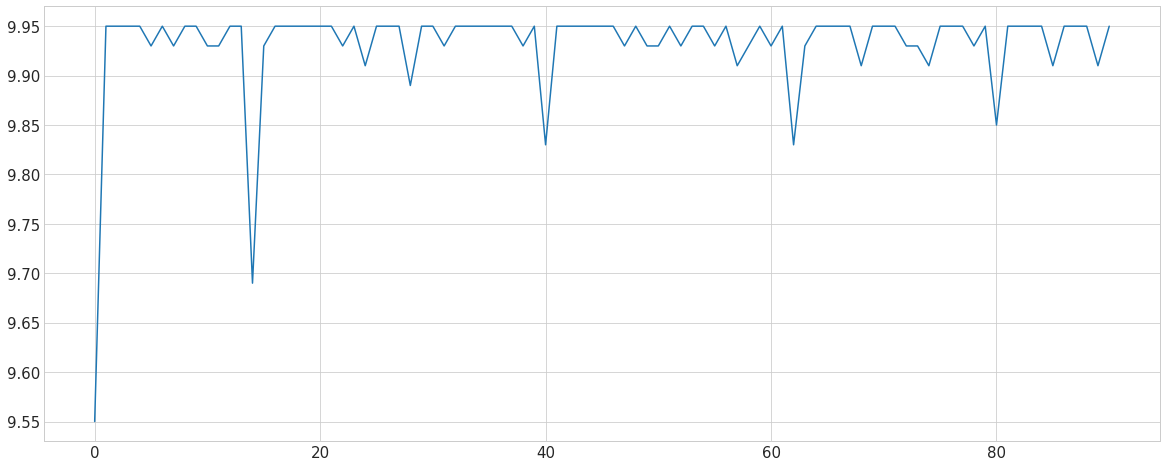

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# for i in range(0, len(plot_list)):
#     if i == 26: continue
#     plt.plot(plot_list[i])
# plt.ylim(-200, 25)

plt.plot(plot_list[0])
# plt.legend(prop={'size': 20})
# plt.xlabel('Iteration', fontsize=15)
# plt.ylabel('Ln P', fontsize=15)

In [4]:
len(plot_list)

179

In [5]:
reward_list = []
episodelength_list = []
collision_list = []
for i in range(NUM_EVAL_EPISODES):
    env.reset()
    current_state = env.current_state_id
    episode_reward = 0
    episode_length = 0
    episode_collision = 0

    while env.terminal==False:
        action =epsilon_greedy(Q[current_state], EPSILON)
        env.step(action)
        S = env.current_state_id
        if env.terminal == True:
            R = 10
        elif env.collided == True:
            R = -0.1
            episode_collision += 1
        else: 
            R = -0.01
        episode_reward += R
        episode_length += 1
        current_state = S
    reward_list.append(episode_reward)
    episodelength_list.append(episode_length)
    collision_list.append(episode_collision)
    print ("episodes: ", i)
        
        

episodes:  0
episodes:  1
episodes:  2
episodes:  3
episodes:  4
episodes:  5
episodes:  6
episodes:  7
episodes:  8
episodes:  9
episodes:  10
episodes:  11
episodes:  12
episodes:  13
episodes:  14
episodes:  15
episodes:  16
episodes:  17
episodes:  18
episodes:  19
episodes:  20
episodes:  21
episodes:  22
episodes:  23
episodes:  24
episodes:  25
episodes:  26
episodes:  27
episodes:  28
episodes:  29
episodes:  30
episodes:  31
episodes:  32
episodes:  33
episodes:  34
episodes:  35
episodes:  36
episodes:  37
episodes:  38
episodes:  39
episodes:  40
episodes:  41
episodes:  42
episodes:  43
episodes:  44
episodes:  45
episodes:  46
episodes:  47
episodes:  48
episodes:  49
episodes:  50
episodes:  51
episodes:  52
episodes:  53
episodes:  54
episodes:  55
episodes:  56
episodes:  57
episodes:  58
episodes:  59
episodes:  60
episodes:  61
episodes:  62
episodes:  63
episodes:  64
episodes:  65
episodes:  66
episodes:  67
episodes:  68
episodes:  69
episodes:  70
episodes:  71
ep

In [6]:
np.mean(episodelength_list)

7.25

In [7]:
np.mean(reward_list)

9.936600000000004

In [8]:
np.mean(collision_list)

0.01